**Author**: Abhay Gajanan Shanbhag

**Written on** :12|02|2023

**Loan Approval Model**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

In [2]:
#Loading the dataSet(Downloaded it from Kaggle)
df=pd.read_csv('/content/Loan Prediction Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

First replace all the None with either mean or mde of that variable throughout the dataset.

In [6]:


df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])



df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())



In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,376,0,100,9,2,2,1
1,LP001003,1,1,1,0,0,306,60,81,9,2,0,0
2,LP001005,1,1,0,0,1,139,0,26,9,2,2,1
3,LP001006,1,1,0,1,0,90,160,73,9,2,2,1
4,LP001008,1,0,0,0,0,381,0,94,9,2,2,1


Label Encoding to convert objects to float value

In [40]:
#Label Encoding for better analysis
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()

#this is a list of all features
cols=["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area","Loan_Status"]

#Looping through all the features
for c in cols:
  df[c]=Encoder.fit_transform(df[c])

#Encoded Data
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,376,0,100,9,2,2,1
1,LP001003,1,1,1,0,0,306,60,81,9,2,0,0
2,LP001005,1,1,0,0,1,139,0,26,9,2,2,1
3,LP001006,1,1,0,1,0,90,160,73,9,2,2,1
4,LP001008,1,0,0,0,0,381,0,94,9,2,2,1


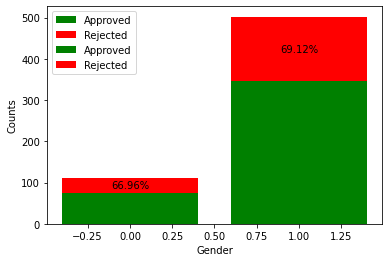

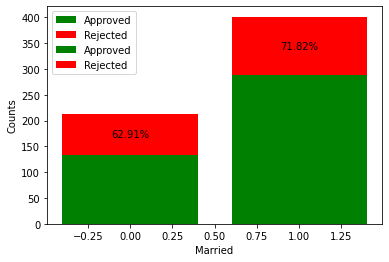

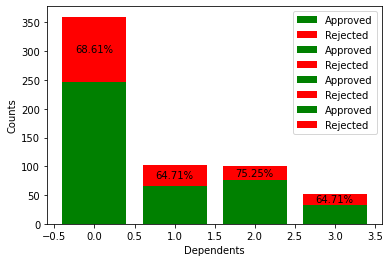

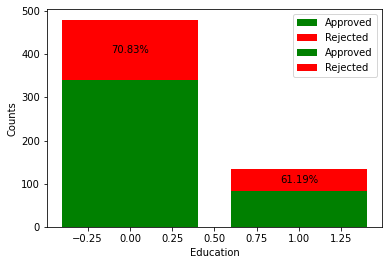

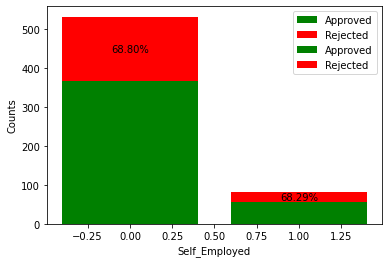

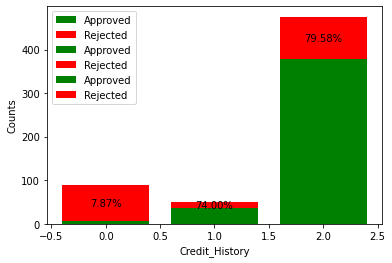

In [21]:
#Create a copy so that we dont change the original
df_copy=df   

#These features are usually dominant in Loan related Models

features=["Gender","Married","Dependents","Education","Self_Employed","Credit_History"]

#Plotting Graph to check which feature's which unique value has a dominant feature
for c in features:


  grouped = df_copy.groupby([c, 'Loan_Status']).size().reset_index(name='counts')

  # Get unique values of NumberOfDependents
  dep_values = grouped[c].unique()

  # Initialize the plot
  fig, ax = plt.subplots()

  # Loop through each unique value of NumberOfDependents
  for dep in dep_values:
      # Filter the grouped dataframe for the current NumberOfDependents value
      dep_group = grouped[grouped[c] == dep]
      approved = dep_group[dep_group['Loan_Status'] == 1]['counts'].values[0]
      rejected = dep_group[dep_group['Loan_Status'] == 0]['counts'].values[0]
      
      # Plot the bar graph
      ax.bar(dep, approved, color='g', label='Approved')
      ax.bar(dep, rejected, bottom=approved, color='r', label='Rejected')
      total = approved + rejected
      percentage = (approved / total) * 100
      ax.text(dep, approved + rejected / 2, f"{percentage:.2f}%", ha='center', va='center')
  # Add labels to the x and y axes
  ax.set_xlabel(c)
  ax.set_ylabel('Counts')

  # Add a legend
  ax.legend()

  plt.show()

## **NOTE **: *Here the percentage shown(nside red area) is that of those who got the loan approved(which is actually green)*

**Educated,Maried, has better chaces to get the loan approved**

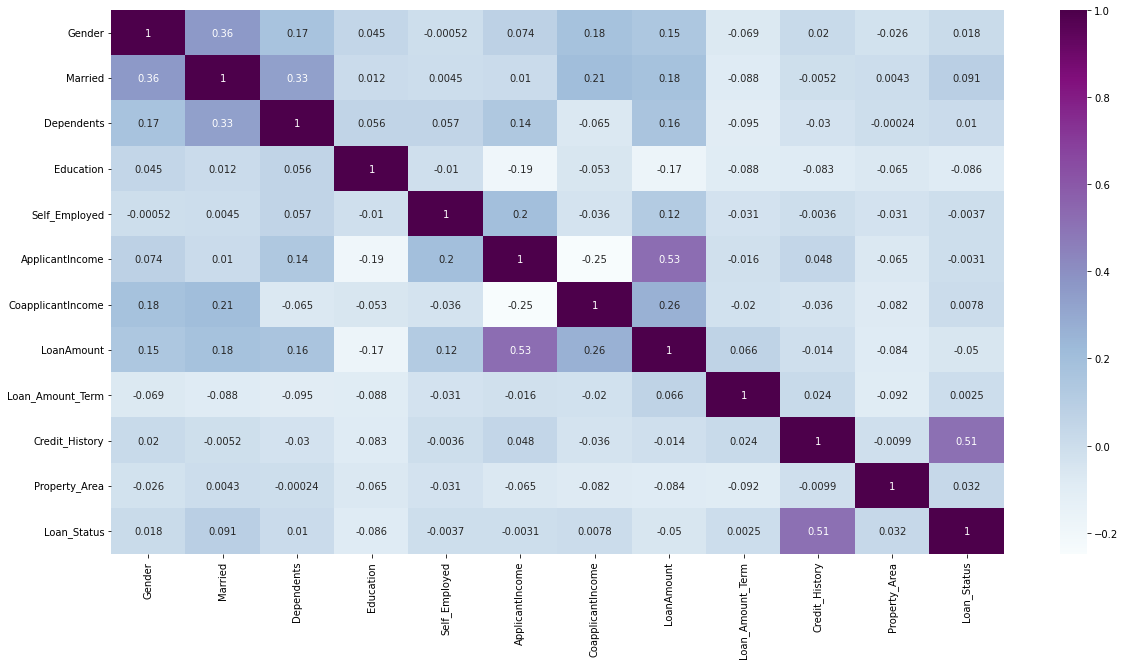

In [30]:
#Drawing a heatmAp to get the correlations
corr = df.corr()
plt.figure(figsize=(20,10))  #Size of each block
sns.heatmap(corr, annot = True, cmap="BuPu")  

After all analysis we have the following porperties to be considered(these can be modified if required)

In [14]:
#X is input,Y is output
X=["Married","Education","Credit_History","LoanAmount","Dependents","Gender","Property_Area"]
Y=["Loan_Status"]

In [36]:
#This is a generalised code to check which algorithm gives best possible result
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


def classify(x,y,model):    #x and y are input and output variable,Model is an object of any type of classifiaction technique
  x_train,x_test,y_train,y_test=train_test_split(df[X],df["Loan_Status"],test_size=0.25,random_state=42)
  model.fit(x_train,y_train)
  print(accuracy_score(y_test,model.predict(x_test)))
  print(  sns.heatmap (confusion_matrix(   y_test , model.predict(x_test) ) ,annot=True)  )
  # score = cross_val_score(model, x, y, cv=5)       #optional
  # print("Cross validation is",np.mean(score)*100)
  print()

0.7987012987012987
AxesSubplot(0.125,0.125;0.62x0.755)

0.6753246753246753
AxesSubplot(0.125,0.125;0.496x0.755)

0.7727272727272727
AxesSubplot(0.125,0.125;0.3968x0.755)

0.6493506493506493
AxesSubplot(0.125,0.125;0.31744x0.755)



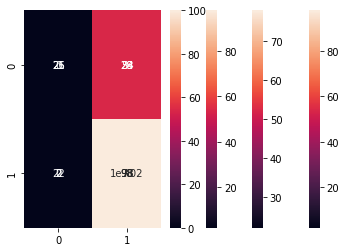

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier


#changing parameters leads to better results

#Creating objects for different objects
RF = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
SVM = SVC( random_state = 0)
LR=LogisticRegression()
DT=DecisionTreeClassifier()

#Fitting that model
classify(X,Y,LR)
# classify(X,Y,DT)
# classify(cols,Y,RF)
# classify(X,Y,SVM)


The Model is now trained and can be futher used to integrate it with either Web or App.